# SVM From Scratch

## Overview
Support Vector Machines, or SVMs, are a type of supervised learning model used for classification. In this notebook, we will build an SVM from scratch in Python using NumPy.

## Introduction
SVMs are margin based classifiers. This means that they find the best line to separate the classes, known as the hyperplane, that maximizes distance from the data. Unlike other classifiers that train only to reduce error, SVMs try to maximize the margin by making the boundary as far away from data as possible as well as minimizing error using a penalty term, allowing the model to make better generalizations on unseen data.

## Code

### Step 1. Generate and Split Data

**Generate Data:**

The function defined below is used to generate our training data. Our function will take input for:
* `samples` or the amount of data points
* `noise` or the amount of gaussian noise to add
* `flipped` or the percent of labels to flip to add more noise
* `test_size` or the percent of samples set aside for the testing set

The function starts by generating data for the two classes, `class_1` and `class_2`. Next, it creates the feature array by vertically stacking the classes and horizontally stacking the labels. Then it adds noise to the features in the array `X` by adding generated Gaussian noise to each sample. Finally, it adds noise to the labels by randomly flipping a certain amount of labels and returns the dataset.

In [28]:
import numpy as np # import numpy for linear algebra and mathematical operations

def generate_dataset(samples=100, noise=0.2, flipped=0.05, test_size=0.2): # define the function and its inputs
    # generate features
    class_1 = np.random.randn(samples, 2) + np.array([2, 2]) # generate class 1s samples
    class_2 = np.random.randn(samples, 2) + np.array([-2, -2]) # generate samples for class 2

    X = np.vstack([class_1, class_2]) # stack samples into one array

    # generate labels
    y = np.hstack([np.ones(samples), -np.ones(samples)]) # add labels for each sample

    # add noise
    X += np.random.randn(*X.shape) * noise # add noise to samples

    flips = int(len(y) * flipped) # calculate amount of labels to flip
    flip_index = np.random.choice(len(y), flips, replace=False) # pick indexes to flip
    y[flip_index] *= -1 # add noise to labels by flipping

    return X, y # return dataset

X, y = generate_dataset(noise=0.3) # call the function to generate data


**Split Data:**

Now we need to split our dataset into training and testing sets. To do this, we will define the function `split_data` with inputs:
* `X` or our features
* `y` or our labels
* `test_size` or the percent of data going to the testing set

Our function starts by creating an array of the possible sample indices and shuffling it. Then it calculates the split index and splits the indices at that point. Finally, it separates the train and test sets using the selected indices and returns the split dataset.

In [29]:
def split_data(X, y, test_size=0.2):
    # shuffle indices for every sample
    indices = np.arange(X.shape[0]) # create array of possible indices
    np.random.shuffle(indices) # shuffle indices randomly

    # calculate index to seperate at
    split_index = int(X.shape[0] * (1 - test_size))

    # split into train/test sets
    train_indices = indices[:split_index] # select training indices
    test_indices = indices[split_index:] # select testing indices

    # seperate target and features into training/testing sets
    X_train = X[train_indices] # seperate training features
    X_test = X[test_indices] # seperate training target
    y_train = y[train_indices].flatten() # seperate testing features
    y_test = y[test_indices].flatten() # seperate training target

    return X_train, X_test, y_train, y_test # return split dataset

X_train, X_test, y_train, y_test = split_data(X, y)

### Step 2. Model Training

SVM models are trained by maximizing the margin or hyperplane between classes. Our function `train` takes input for:
* `X` or our training features
* `y` or our training labels
* `learning_rate` or how much the model can update parameters at once while training
* `penalty` or how much the model avoids errors compared to how much it prioritizes generalization
* `epochs` or the amount of times the model trains itself on the data

The function starts by getting the number of `samples` and `features` in the data and initializing its `weights` and `bias` with zeros. Then the model starts training by iterating through each `epoch`. For every epoch, the model does the following for each sample in the data:
1. predicts the label for the sample using current weights and bias
2. multiplies the prediction by the true label to check if the sample is classified correctly and outside the margin
3. if that is true then the `derivative_weights` are set to the current `weights` and the `derivative_bias` is set to 0 to maximize margin by pushing the weights into smaller values using *regularization gradient*
4. if it is false, `derivative_weights` and `derivative_bias` are calculated using the hinge loss gradient
5. the models `weights` and `bias` are updated using the derivatives
6. the function returns the learned `weights` and `bias`

In [30]:
def train(X, y, learning_rate=0.001, penalty=1.0, epochs=5000): # defin training function with inputs
    samples, features = X.shape # determine the amount of samples and features in the dataset

    weights = np.zeros(features) # initialize a weight for each feature
    bias = 0.0 # initialize the bias

    for epoch in range(epochs): # training loop, 1 cycle per epoch
        for i in range(samples): # iterate through each sample in the data
            prediction = np.dot(X[i], weights) + bias # predict current sample with the current weights and bias
            condition = y[i] * prediction >= 1 # check if sample was correctly classified

            if condition: # if the sample was correctly classified use regularization gradient
                derivative_weights = weights # set derivitive weights to the current weights
                derivative_bias = 0 # set the derivative bias to 0
            else: # if the sample was incorrectly classified, use hinge loss gradient
                derivative_weights = weights - penalty * y[i] * X[i] # calculate derivitve weights
                derivative_bias = -penalty * y[i] # calculate derivative bias

            weights -= learning_rate * derivative_weights # update weights using derivative
            bias -= learning_rate * derivative_bias # update bias using derivative

    return weights, bias # return learned weights and bias after training

weights, bias = train(X_train, y_train) # train a model on our dataset

### Step 3. Predict Data

Now we can use our model to predict data. The function `predict` defined below takes input for:
* `X` or the data to predict
* `weights` or the weights the model learned
* `bias` or the model's learned bias

The function then uses the weights and bias to calculate and classify the data.

In [31]:
def predict(X, w, b): # define predict function with input for data, weights, and bias
    return np.sign(np.dot(X, w) + b) # return the predicted class

predictions = predict(X_test, weights, bias) # predict the X data

### Step 4. Model Evaluation

To evaluate our model, we will calculate the accuracy score and plot the decision boundary.

**Accuracy Score:**

Accuracy score is calculated by counting how many predictions were correct and finding the average of that.

In [32]:
accuracy = np.mean(predictions == y_test) # calculate accuracy score
print(f"Model Accuracy: {accuracy*100:.2f}%") # print accuracy score as percentage

Model Accuracy: 95.00%


**Plotting Decision Boundary**


Below we use matplotlib to plot the decision boundary. First, we create a figure. Then, we plot our data points. Finally, we calculate the decision boundary and display the chart.

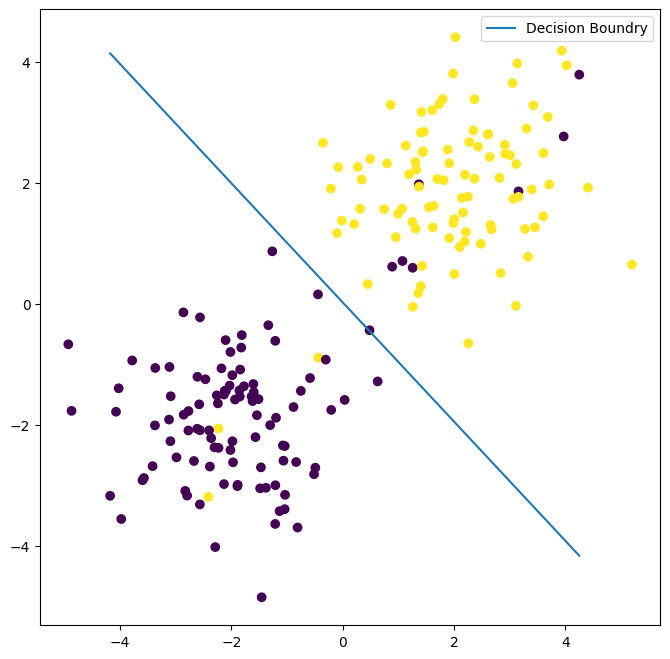

In [33]:
import matplotlib.pyplot as plt # import for graphing

plt.figure(figsize=(8,8)) # create figure
plt.scatter(X[:, 0], X[:, 1], c=y) # plot data
x1 = np.linspace(X_test[:,0].min(), X_test[:,0].max(), 200) # x values across range
x2 = -(weights[0] * x1 + bias) / weights[1] # x values using decision boundry
plt.plot(x1, x2, label="Decision Boundry") # plot decision boundry linne

plt.legend() # add a legend
plt.show() # print the chart


## Author and Liscense

This notebook was authored by Aiden Flynn and is available under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0.txt) Liscense.

[Kaggle](https://www.kaggle.com/flynn28) | [Github](https://github.com/flynn-28/)